In [14]:
import pandas as pd
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity


dataset = pd.read_excel('fanads.xlsx')
dataset.head()



,Asset Turnover Ratio (%),Basic EPS (Rs.),Cash EPS (Rs.),Cash Earnings Retention Ratio (%),Current Ratio (X),Diluted EPS (Rs.),Dividend Payout Ratio (CP) (%),Dividend Payout Ratio (NP) (%),EV/EBITDA (X),EV/Net Operating Revenue (X),...,PBIT Margin (%),PBT Margin (%),Price/BV (X),Price/Net Operating Revenue,Quick Ratio (X),Retention Ratios (%),Return on Assets (%),Return on Capital Employed (%),Return on Networth / Equity (%),Total Debt/Equity (X)
0,86.380000,75.533333,92.270000,77.153333,0.903333,75.533333,22.846667,27.960000,6.413333,1.973333,...,26.260000,25.366667,3.056667,2.023333,0.616667,72.030000,16.656667,24.260000,28.646667,0.086667
1,197.146667,49.976667,55.176667,70.516667,2.336667,49.976667,29.483333,32.483333,5.740000,0.930000,...,14.910000,14.900000,3.150000,1.090000,1.470000,67.506667,19.543333,28.163333,28.856667,0.000000
2,0.860000,0.243333,0.300000,0.000000,1.506667,0.243333,0.000000,0.000000,40.986667,26.063333,...,18.483333,15.596667,1.453333,19.383333,1.503333,0.000000,0.310000,0.336667,0.903333,1.556667
3,70.873333,37.843333,46.543333,86.123333,1.296667,37.153333,13.876667,-17.720000,8.530000,1.793333,...,18.493333,12.690000,2.133333,1.276667,0.806667,117.713333,6.943333,11.933333,16.286667,0.886667
4,72.966667,13.143333,16.030000,85.703333,3.083333,13.143333,14.296667,17.506667,17.273333,4.150000,...,20.423333,20.090000,3.906667,4.133333,1.956667,82.483333,12.216667,15.376667,15.916667,0.023333


In [17]:

#KMO test
kmo_model=calculate_kmo(dataset)
print('KMO:',kmo_model)


#Bartlett's test
chi_square_value,p_value=calculate_bartlett_sphericity(dataset)
print('Chi Square:',chi_square_value, 'p_value:',p_value)


KMO: (array([0.34759401, 0.75116516, 0.75735817, 0.64884197, 0.41028185,
       0.73816118, 0.47576463, 0.50393452, 0.64924832, 0.94439433,
       0.56814414, 0.56721872, 0.17461934, 0.11899786, 0.52339767,
       0.60999994, 0.48142835, 0.47634764, 0.68769067, 0.68426793,
       0.52558443, 0.41245916, 0.56812925, 0.71718898, 0.69662911,
       0.58733174, 0.04057797]), 0.569975219653143)
Chi Square: 8755.73435249583 p_value: 0.0


FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
        method='minres', n_factors=3, rotation='promax',
        rotation_kwargs={}, use_smc=True)
[7.02749037e+00 6.41152847e+00 3.15996224e+00 2.28633017e+00
 1.93922339e+00 1.46900105e+00 1.07717116e+00 8.49920762e-01
 7.60563723e-01 5.80608535e-01 4.39701951e-01 3.74980676e-01
 2.77266500e-01 1.44783509e-01 7.61329178e-02 5.16853201e-02
 3.33041622e-02 2.57096177e-02 1.07669864e-02 3.46061608e-03
 1.43836475e-04 1.15133312e-04 8.84419717e-05 4.64063667e-05
 1.39682089e-05 1.00046839e-07 6.42905528e-10]


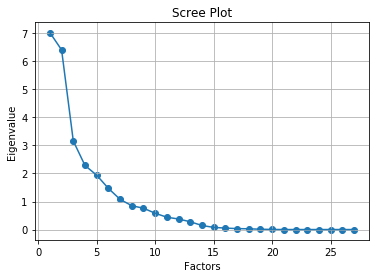

In [22]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
fa=FactorAnalyzer()
print(fa)
fa.fit(dataset)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
print(ev)
# Create scree plot using matplotlib
plt.scatter(range(1,dataset.shape[1]+1),ev)
plt.plot(range(1,dataset.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
X=dataset.values
X=scale(X)
pca=PCA(n_components=7)
pca.fit(X)
print(pca.explained_variance_)

[7.10471554 6.48198482 3.1946871  2.31145467 1.96053353 1.48514392
 1.0890082 ]


In [24]:
pca=PCA(n_components=7)
pca.fit(X)
m=pd.DataFrame(pca.components_).T
print(pd.DataFrame(pca.components_).T)

           0         1         2         3         4         5         6
0   0.226905  0.023730  0.135278 -0.062603  0.001397 -0.412467 -0.197950
1   0.323362  0.126023 -0.166072  0.052543 -0.054299  0.086167  0.092078
2   0.317263  0.125997 -0.166739  0.057270 -0.078366  0.077940  0.133957
3   0.120121  0.071414  0.481105 -0.018620 -0.181088  0.174936 -0.046326
4  -0.089585  0.116444  0.070884  0.569558  0.112127 -0.006504  0.015539
5   0.323168  0.126094 -0.166406  0.052721 -0.054438  0.087428  0.092665
6   0.089153  0.027526  0.166692 -0.177288  0.590291  0.152501  0.191969
7   0.098253  0.023161  0.172709 -0.190291  0.581633  0.115723  0.198012
8  -0.049104  0.063606  0.138643  0.435155  0.194630 -0.022759  0.119694
9  -0.157933  0.349701  0.008561 -0.090054 -0.020027 -0.062128 -0.036937
10  0.116140  0.074271  0.473810 -0.013860 -0.196849  0.221170 -0.077383
11  0.270857  0.134141 -0.207715  0.075858 -0.100809  0.223903  0.168405
12  0.037003  0.008440  0.170963  0.043925 -0.10152